In [ ]:
# Run-data-loading cell inserted to ensure df exists
source
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Preprocessing utilities: drop highly-missing cols, impute, encode categorical
def preprocess_for_model(df_in, target_col='target', drop_thresh=0.5, max_card_onehot=10):
    df = df_in.copy()
    # Drop columns with too many missing values
    drop_cols = [c for c in df.columns if df[c].isnull().mean() > drop_thresh]
    if drop_cols:
        print('Dropping columns with high missing rate:', drop_cols)
        df = df.drop(columns=drop_cols)
    # Impute numeric with median, categorical with mode
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    for c in num_cols:
        df[c] = df[c].fillna(df[c].median())
    for c in cat_cols:
        mode = df[c].mode()
        fill = mode.iloc[0] if not mode.empty else 'missing'
        df[c] = df[c].fillna(fill)
    # Encode categoricals: one-hot for low cardinality, label for high
    from sklearn.preprocessing import LabelEncoder
    for c in list(cat_cols):
        if df[c].nunique() <= max_card_onehot:
            df = pd.get_dummies(df, columns=[c], prefix=c, drop_first=True)
        else:
            le = LabelEncoder()
            df[c] = le.fit_transform(df[c].astype(str))
    return df

# Apply preprocessing
cleaned = preprocess_for_model(df, target_col='target', drop_thresh=0.5, max_card_onehot=10)
# Prepare X and y — prefer a column named 'target' or use last column
if 'target' in cleaned.columns:
    y = cleaned['target']
    X = cleaned.drop(columns=['target'])
else:
    y = cleaned.iloc[:, -1]
    X = cleaned.iloc[:, :-1]

# If X has non-numeric columns (rare after preprocessing), drop them for baseline
X_numeric = X.select_dtypes(include=[np.number]).copy()
if X_numeric.shape[1] != X.shape[1]:
    dropped = set(X.columns) - set(X_numeric.columns)
    print('Dropping non-numeric columns for baseline model:', dropped)

# Train/test split with stratify when possible
stratify = y if len(np.unique(y)) > 1 else None
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42, stratify=stratify)

# Build pipeline and train baseline model
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs'))
pipe.fit(X_train, y_train)

# Predictions and evaluation
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {acc:.4f}')
print('















print(f'Saved baseline model to {model_path}')joblib.dump(pipe, model_path)model_path = 'baseline_model.pkl'# Save baseline modelplt.show()plt.title('Confusion Matrix')plt.ylabel('Actual')plt.xlabel('Predicted')sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')plt.figure(figsize=(6,5))cm = confusion_matrix(y_test, y_pred)# Confusion matrix plotprint(classification_report(y_test, y_pred))Classification report:')

Notebook working directory: c:\Users\user\Downloads\Capstone project
No local CSV/Excel found — loading sklearn iris sample dataset as `df`
Saved sample_iris.csv in notebook folder

Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


None


Describe:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Missing values per column:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

c:\Users\user\anaconda\envs\pthyon-project\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Baseline model accuracy: 0.9333

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



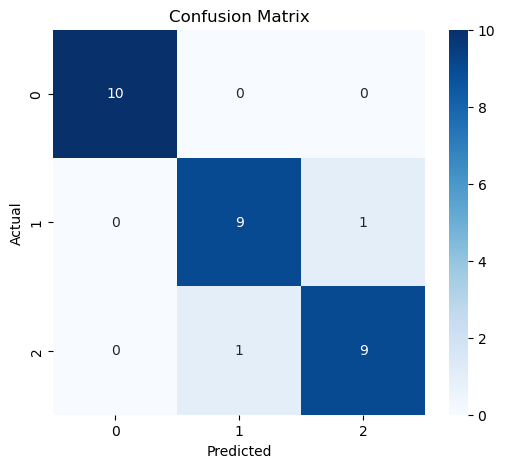

Saved baseline model to baseline_model.pkl


In [3]:
# Run the exported script to generate Markdown and HTML reports
print('Running export_results.py from notebook kernel')
exec(open('export_results.py', 'r', encoding='utf-8').read())